Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_10.png


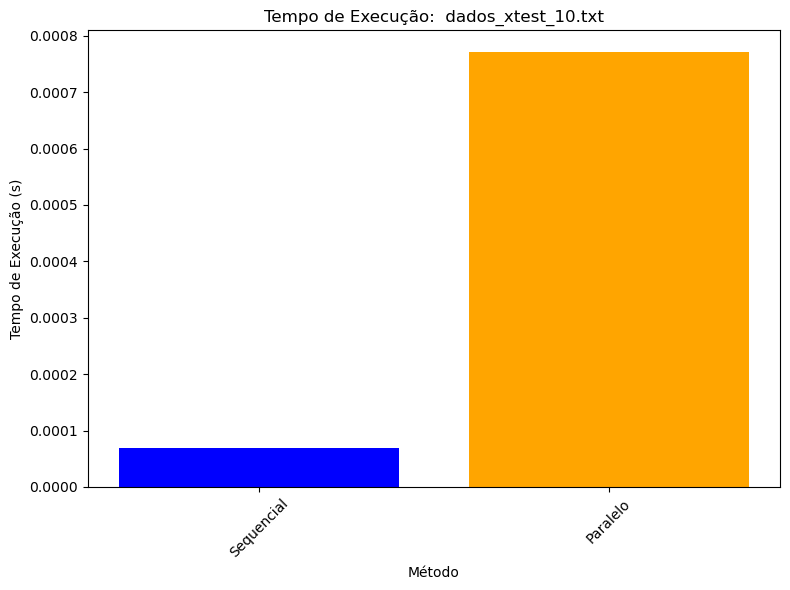

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_30.png


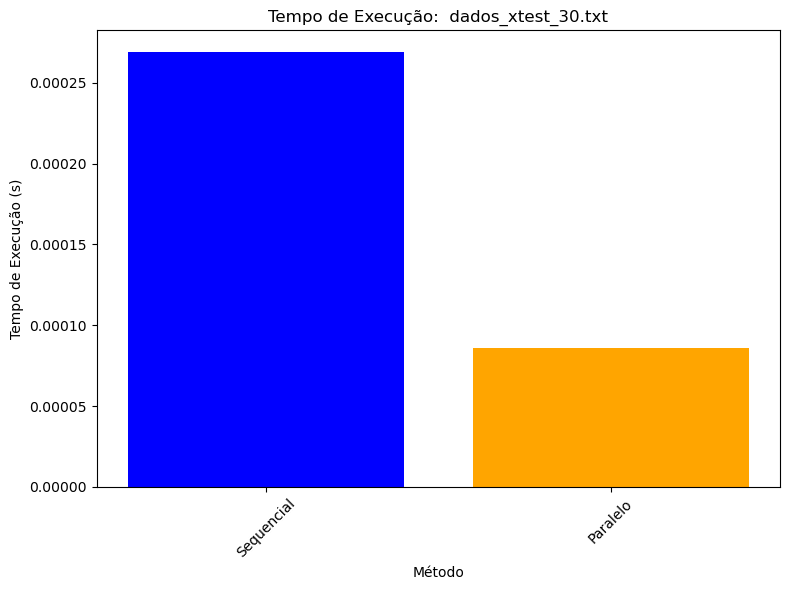

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_50.png


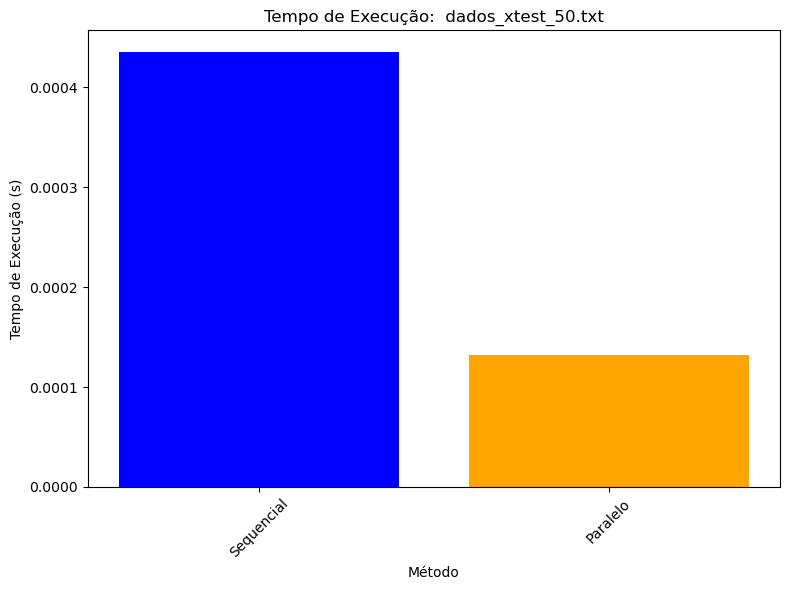

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_100.png


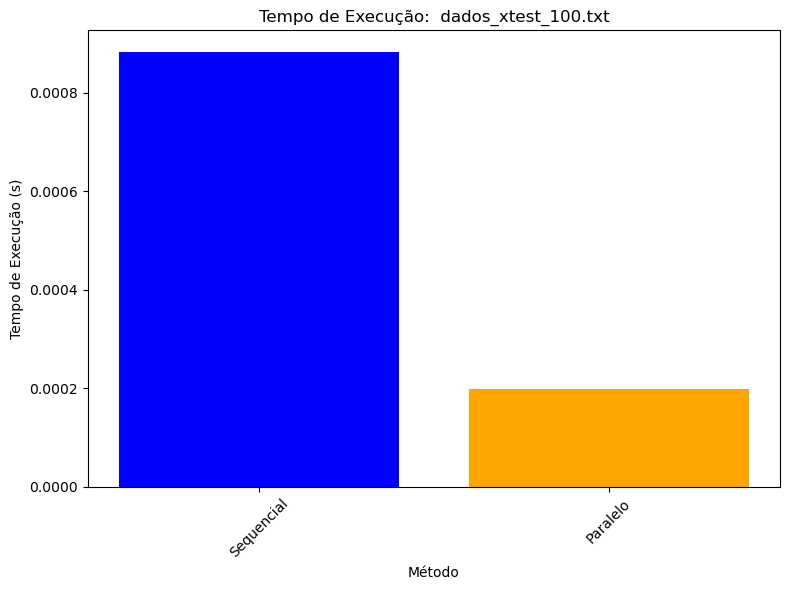

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_1000.png


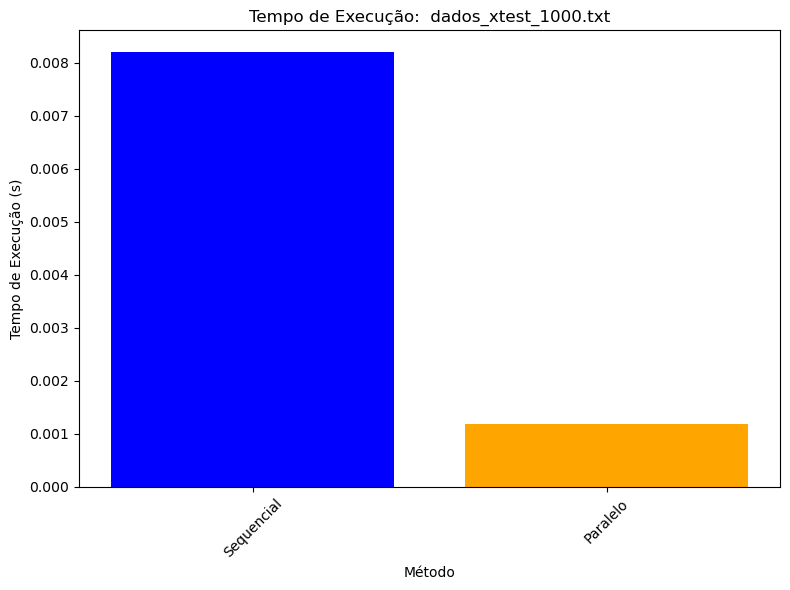

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_100000.png


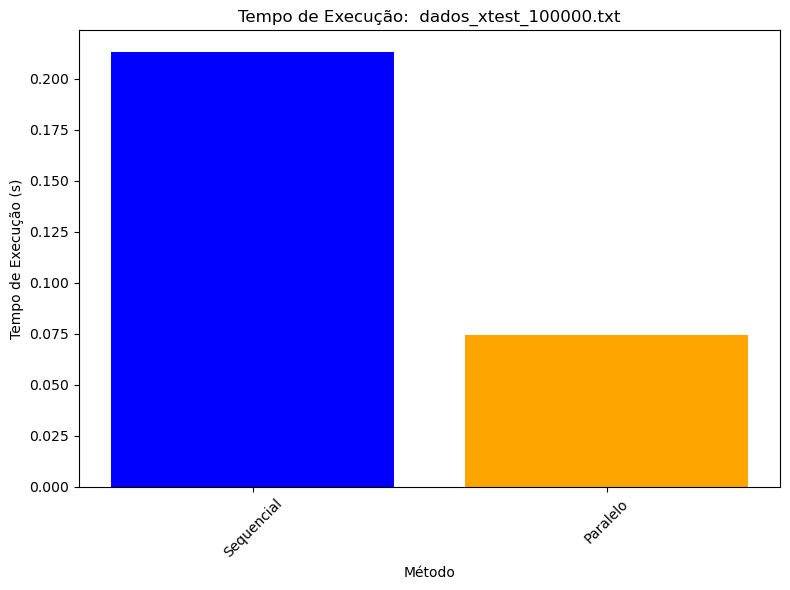

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_1000000.png


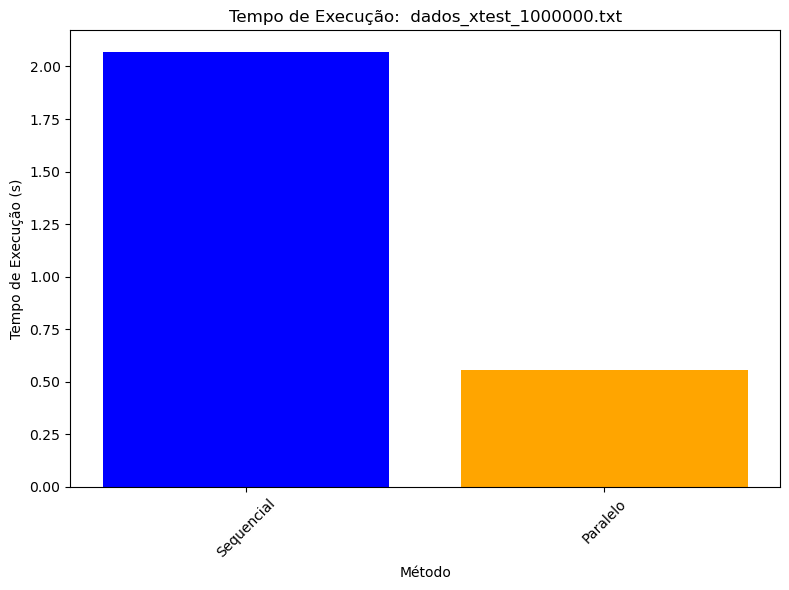

Gráfico salvo como: ../reports/graphics/grafico_ dados_xtest_10000000.png


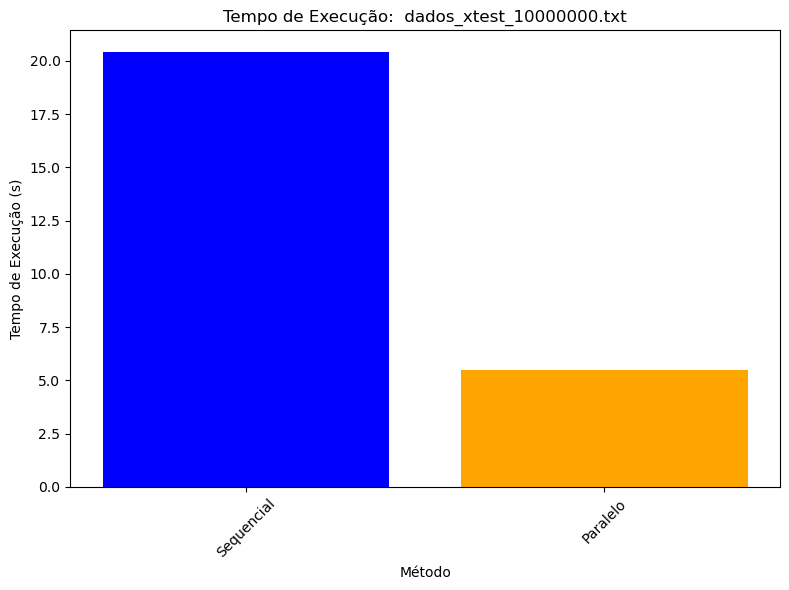

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar os gráficos
def gerar_graficos(arquivo_tempos):
    # Ler os dados do arquivo
    colunas = ['Metodo', 'Dataset', 'Tempo']
    dados = pd.read_csv(arquivo_tempos, header=None, names=colunas)

    # Obter os nomes dos datasets únicos
    datasets = dados['Dataset'].unique()

    # Criar um gráfico para cada dataset
    for dataset in datasets:
        df_dataset = dados[dados['Dataset'] == dataset]

        # Gerar gráfico comparando os tempos
        plt.figure(figsize=(8, 6))
        plt.bar(df_dataset['Metodo'], df_dataset['Tempo'], color=['blue', 'orange'])
        plt.title(f"Tempo de Execução: {dataset}")
        plt.xlabel("Método")
        plt.ylabel("Tempo de Execução (s)")
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Salvar o gráfico como uma imagem
        nome_imagem = f"../reports/graphics/grafico_{dataset.replace('.txt', '')}.png"
        plt.savefig(nome_imagem)
        print(f"Gráfico salvo como: {nome_imagem}")

        # Exibir o gráfico
        plt.show()

# Arquivo de entrada
arquivo_tempos = "../reports/time/tempos_execucao.txt"

# Gerar os gráficos
gerar_graficos(arquivo_tempos)

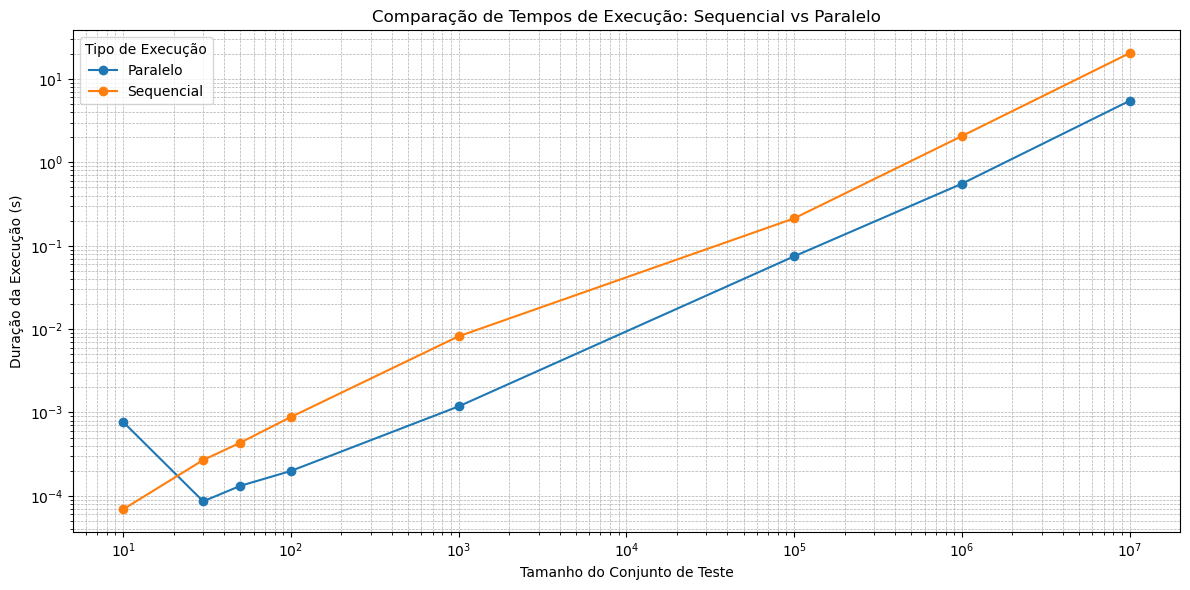

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Nome do arquivo
arquivo = "../reports/time/tempos_execucao.txt"

# Ler os dados do arquivo
df = pd.read_csv(arquivo, header=None, names=["Execucao", "Arquivo", "Tempo"])

# Extrair o tamanho dos dados do nome do arquivo
df["Tamanho"] = df["Arquivo"].str.extract(r'(\d+)').astype(int)

# Calcular a média dos tempos para cada combinação de Execução e Tamanho
summary = df.groupby(["Execucao", "Tamanho"]).agg(Media_Tempo=("Tempo", "mean")).reset_index()

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Separar os dados por tipo de execução
for execucao in summary["Execucao"].unique():
    subset = summary[summary["Execucao"] == execucao]
    plt.plot(subset["Tamanho"], subset["Media_Tempo"], marker='o', label=execucao)

# Configurações do gráfico
plt.xlabel("Tamanho do Conjunto de Teste")
plt.ylabel("Duração da Execução (s)")
plt.title("Comparação de Tempos de Execução: Sequencial vs Paralelo")
plt.legend(title="Tipo de Execução")
plt.xscale("log")  # Escala logarítmica para o eixo x (para melhor visualização)
plt.yscale("log")  # Escala logarítmica para o eixo y (opcional, se necessário)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

output_file = "../reports/graphics/comparacao_tempos_execucao.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Mostrar o gráfico
plt.show()
